In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

## Note 
Search this document for exclamation marks ! to find code chunks where the user can alter values to examine impacts under the sensitivity analysis

# Sensitivity Analysis of ReNeM CBA Components 

## Defining inputs 
In this section, I define the net present value (NPV) inputs used for this sensitivity analysis. Put another way, I define the NPV function generally and then show how it applies specifically to an agency, the rechargers, and the third-party certifier (TPC) in a ReNeM program. Broadly, NPV is generally based on discount rate (r), number of years (n), and annual benefits and costs.

In [2]:
def npv(r, n, annual_benefit, annual_cost):
    numerator = annual_benefit - annual_cost
    array = np.arange(0,n)
    denominator = (1+r)**array  
    return np.sum(numerator/denominator)

In [3]:
def npvs(n,Q,V,C,lam,r,o,s,a,M_e,M_l,P,F,tpc_ac,tpc_fc,i,B): 
    
    b_agency = Q * V
    c_agency = Q * C * lam + i + o * s
    npv_agency = npv(r,n,b_agency,c_agency)
    
    b_recharger = Q * C * lam + s * o
    c_recharger = o * M_e + a * (M_l + P) + B
    npv_recharger = npv(r,n,b_recharger,c_recharger)
    
    npv_tpc = npv(r,n,0,tpc_ac) - (F + tpc_fc)
    
    return npv_agency, npv_recharger, npv_tpc

## User-defined inputs 
Here, the user can input the parameters that will serve as the benchmark for this sensitivity analysis . Each individual sensitivity analysis alters one of the below variables at a time and will assume that all non-altered variables have the quantity defined in this code chunk. Presently, the values defined in this code chunk are derived from the experience at the Kelly-Thompson Ranch recharge site. 

In [4]:
# ! Adjust these to capture different baseline conditions

n=25            # project lifespan 
Q=375           # acre feet of water recharged per year, uniform
V=650           # water replacement value
C=263           # volumetric pumping fee
lam=.5          # ReNeM rebate factor 
r=.06           # discount rate 
o=2             # number of ReNeM projects
s=0             # baseline payment value per recharge project when agency pays rechargers a baseline
a=10.3          # acrage dedicated exclusively to ReNeM
M_e=500         # annual site operation and maintenance costs per project related to equipment
M_l=1000        # annual site operation and maintenance costs per acre related to labor
P=1780          # annual opportunity costs to the recharger 
F=847000        # fixed design and construction costs per ReNeM project 
tpc_ac=13400    # annual third party certification costs 
tpc_fc=3700     # one-time, fixed third party certification costs 
i=0             # incidental program operation costs 
B=0             # cost of obtaining excess water

In [5]:
npvs(n=n,Q=Q,V=V,C=C,lam=lam,r=r,o=o,s=s,a=a,M_e=M_e,M_l=M_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)

(2634697.641804711, 266650.7106101138, -1032274.7908720444)

## Analysis 

### Discount Rate (r)

In [6]:
r_range = np.arange(0,13)/100
est_indx = np.where(r_range==r)[0][0]

R_npvs = np.zeros(len(r_range))
A_npvs = np.zeros(len(r_range))
T_npvs = np.zeros(len(r_range))
for i, R in enumerate(r_range):
    A_npvs[i], R_npvs[i], T_npvs = npvs(n=n,Q=Q,V=V,C=C,lam=lam,r=R,o=o,s=s,a=a,M_e=M_e,M_l=M_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)

# Final Chart

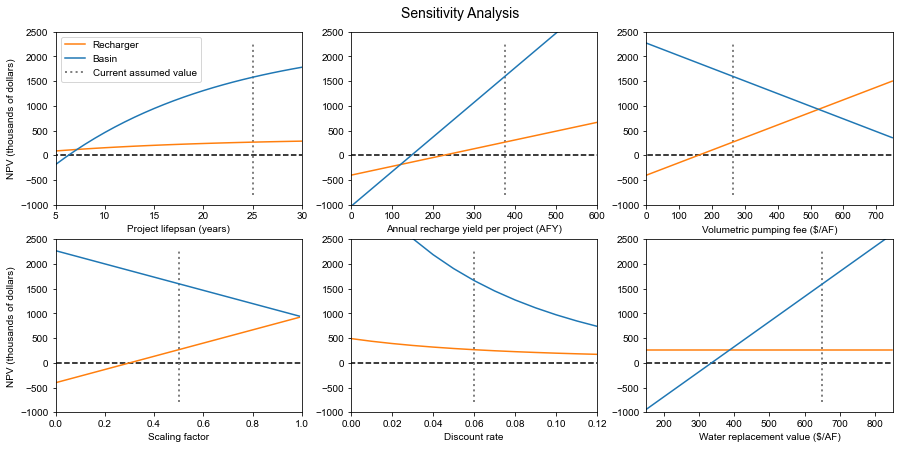

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,  figsize = (15,7))
fig.suptitle('Sensitivity Analysis', y = .93, fontsize = 14)

#Project lifespan 
N1_range = np.arange(4,35)
est1_indx = np.where(N1_range==n)[0][0]
R1_npvs = np.zeros(len(N1_range))
A1_npvs = np.zeros(len(N1_range))
T1_npvs = np.zeros(len(N1_range))
for i, N in enumerate(N1_range):
    A1_npvs[i], R1_npvs[i], T1_npvs = npvs(n=N,Q=Q,V=V,C=C,lam=lam,r=r,o=o,s=s,a=a,M_e=M_e,M_l=M_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)
ax1.hlines(0,-10000,1000,color="black",linestyle="dashed"  )
#ax1.plot(N1_range, A1_npvs/1e3, label = "Basin" )
ax1.plot(N1_range, R1_npvs/1e3, color='#ff7f0e', label = "Recharger")
ax1.plot(N1_range, (A1_npvs + T1_npvs)/1e3, color='#1f77b4', label = "Basin" )
ax1.vlines(n,-800, 2300, color="grey",linestyle = "dotted", linewidths=2, label = "Current assumed value")
#ax1.scatter(N1_range[est1_indx],A1_npvs[est1_indx]/1e3, edgecolor="blue", s=70, marker="D")
#ax1.scatter(N1_range[est1_indx],R1_npvs[est1_indx]/1e3, edgecolor="orange", s=70, marker="D")
#ax1.scatter(N1_range[est1_indx],(A1_npvs[est1_indx] + T1_npvs)/1e3, edgecolor="green", s=70, marker="D")
ax1.set_ylabel("NPV (thousands of dollars)", size = 10)
ax1.set_xlabel("Project lifepsan (years)", size = 10)
ax1.set_xlim(5,30)
ax1.set_ylim(-1000,2500)
ax1.legend(loc = "upper left")

#Amount recharged 
Q2_range = np.arange(0,625)
est2_indx = np.where(Q2_range==Q)[0][0]
R2_npvs = np.zeros(len(Q2_range))
A2_npvs = np.zeros(len(Q2_range))
T2_npvs = np.zeros(len(Q2_range))
for i, q in enumerate(Q2_range):
    A2_npvs[i], R2_npvs[i], T2_npvs = npvs(n=n,Q=q,V=V,C=C,lam=lam,r=r,o=o,s=s,a=a,M_e=M_e,M_l=M_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)    
#ax2.vlines(Q,-1.2,2, linestyle='dashed') # ! I don't actually know what this is doing
ax2.hlines(0,-10000,1000,color="black",linestyle="dashed"  )
#ax2.plot(Q2_range, A2_npvs/1e3, label = "Basin")
ax2.plot(Q2_range, R2_npvs/1e3, color='#ff7f0e', label = "Recharger" )
ax2.plot(Q2_range, (A2_npvs + T2_npvs)/1e3, color='#1f77b4', label = "Basin incurring TPC costs" )
ax2.vlines(Q,-800, 2300, color="grey",linestyle = "dotted", linewidths=2)
#ax2.scatter(Q2_range[est2_indx],A2_npvs[est2_indx]/1e3, edgecolor="blue", s=70, marker="D")
#ax2.scatter(Q2_range[est2_indx],R2_npvs[est2_indx]/1e3, edgecolor="orange", s=70, marker="D")
#ax2.scatter(Q2_range[est2_indx],(A2_npvs[est2_indx] + T2_npvs)/1e3, edgecolor="green", s=70, marker="D")
#ax2.set_ylabel("NPV (thousands of dollars)")
ax2.set_xlabel("Annual recharge yield per project (AFY)", size = 10)
ax2.set_xlim(0,600)
ax2.set_ylim(-1000,2500)
#ax2.legend(loc = "upper left", size = 10)

#Volumetric pumping fee
C3_range = np.arange(0,750)
est3_indx = np.where(C3_range.round()==round(C,))
R3_npvs = np.zeros(len(C3_range))
A3_npvs = np.zeros(len(C3_range))
T3_npvs = np.zeros(len(C3_range))
for i, c in enumerate(C3_range):
    A3_npvs[i], R3_npvs[i], T3_npvs = npvs(n=n,Q=Q,V=V,C=c,lam=lam,r=r,o=o,s=s,a=a,M_e=M_e,M_l=M_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)
#ax3.vlines(Q,-1.2,2, linestyle='dashed') # ! I don't actually know what this is doing
ax3.hlines(0,-10000,1000,  color="black",linestyle="dashed"  )
#ax3.plot(C3_range, A3_npvs/1e3, label = "Basin")
ax3.plot(C3_range, R3_npvs/1e3, color='#ff7f0e', label = "Recharger" )
ax3.plot(C3_range, (A3_npvs + T3_npvs)/1e3, color='#1f77b4', label = "Basin incurring TPC costs" )
ax3.vlines(C,-800, 2300, color="grey",linestyle = "dotted", linewidths=2)
#ax3.scatter(C3_range[est3_indx],A3_npvs[est3_indx]/1e3, edgecolor="blue", s=70, marker="D")
#ax3.scatter(C3_range[est3_indx],R3_npvs[est3_indx]/1e3, edgecolor="orange", s=70, marker="D")
#ax3.scatter(C3_range[est3_indx],(A3_npvs[est3_indx] + T3_npvs)/1e3, edgecolor="green", s=70, marker="D")
ax3.set_xlim(0,750)
ax3.set_ylim(-1000,2500)
#ax3.set_ylabel("NPV (thousands of dollars)", size = 10)
ax3.set_xlabel("Volumetric pumping fee ($/AF)", size = 10)

#Rebate factor 
lam4_range = np.arange(0,100)/100
est4_indx = np.where(lam4_range.round(2)==lam)
R4_npvs = np.zeros(len(lam4_range))
A4_npvs = np.zeros(len(lam4_range))
T4_npvs = np.zeros(len(lam4_range))
for i, LAM in enumerate(lam4_range):
    A4_npvs[i], R4_npvs[i], T4_npvs = npvs(n=n,Q=Q,V=V,C=C,lam=LAM,r=r,o=o,s=s,a=a,M_e=M_e,M_l=M_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)
#ax4.vlines(Q,-1.2,2, linestyle='dashed') # ! I don't actually know what this is doing
ax4.hlines(0,-10000,1000, color="black",linestyle="dashed"  )
#ax4.plot(lam4_range, A4_npvs/1e3, label = "Basin")
ax4.plot(lam4_range, R4_npvs/1e3, color='#ff7f0e', label = "Recharger" )
ax4.plot(lam4_range, (A4_npvs + T4_npvs)/1e3, color='#1f77b4', label = "Basin incurring TPC costs" )
ax4.vlines(lam,-800, 2300, color="grey",linestyle = "dotted", linewidths=2)
#ax4.scatter(lam4_range[est4_indx],A4_npvs[est4_indx]/1e3, edgecolor="blue", s=70, marker="D")
#ax4.scatter(lam4_range[est4_indx],R4_npvs[est4_indx]/1e3, edgecolor="orange", s=70, marker="D")
#ax4.scatter(lam4_range[est4_indx],(A4_npvs[est4_indx] + T4_npvs)/1e3, edgecolor="green", s=70, marker="D")
ax4.set_xlim(0,1)
ax4.set_ylim(-1000,2500)
ax4.set_ylabel("NPV (thousands of dollars)", size = 10)
ax4.set_xlabel("Scaling factor", size = 10)

#Discount rate (r)
r5_range = np.arange(0,13)/100
est5_indx = np.where(r5_range==r)[0][0]
R5_npvs = np.zeros(len(r_range))
A5_npvs = np.zeros(len(r_range))
T5_npvs = np.zeros(len(r_range))
for i, R in enumerate(r_range):
    A5_npvs[i], R5_npvs[i], T5_npvs = npvs(n=n,Q=Q,V=V,C=C,lam=lam,r=R,o=o,s=s,a=a,M_e=M_e,M_l=M_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)
ax5.hlines(0,-10000,1000,color="black",linestyle="dashed"  )
ax5.plot(r5_range, (A5_npvs + T5_npvs)/1e3, label = "Basin incurring TPC costs" )
ax5.plot(r5_range, R5_npvs/1e3, label = "Recharger")
ax5.vlines(r,-800, 2300, color="grey",linestyle = "dotted", linewidths=2)
#ax.scatter(r_range[est_indx],A_npvs[est_indx]/1e3, edgecolor="blue", s=70, marker="D")
#ax.scatter(r_range[est_indx],R_npvs[est_indx]/1e3, edgecolor="orange", s=70, marker="D")
#ax.scatter(r_range[est_indx],(A_npvs[est_indx] + T_npvs)/1e3, edgecolor="green", s=70, marker="D")
ax5.set_xlim(0,.12)
ax5.set_ylim(-1000,2500)
#ax5.set_ylabel("NPV (thousands of dollars)", size = 10)
ax5.set_xlabel("Discount rate")

#Water replacement value 
V6_range = np.arange(150,850)
est6_indx = np.where(V6_range.round()==round(V,))
R6_npvs = np.zeros(len(V6_range))
A6_npvs = np.zeros(len(V6_range))
T6_npvs = np.zeros(len(V6_range))
for i, v in enumerate(V6_range):
    A6_npvs[i], R6_npvs[i], T6_npvs = npvs(n=n,Q=Q,V=v,C=C,lam=lam,r=r,o=o,s=s,a=a,M_e=M_e,M_l=M_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)
#ax6.vlines(Q,-1.2,2, linestyle='dashed') # ! I don't actually know what this is doing
ax6.hlines(0,-10000,10000,  color="black",linestyle="dashed"  )
#ax6.plot(V6_range, A6_npvs/1e3, label = "Basin")
ax6.plot(V6_range, R6_npvs/1e3, color='#ff7f0e', label = "Recharger" )
ax6.plot(V6_range, (A6_npvs + T6_npvs)/1e3, color='#1f77b4', label = "Basin incurring TPC costs" )
ax6.vlines(V,-800, 2300, color="grey",linestyle = "dotted", linewidths=2)
#ax6.scatter(V6_range[est6_indx],A6_npvs[est6_indx]/1e3, edgecolor="blue", s=70, marker="D")
#ax6.scatter(V6_range[est6_indx],R6_npvs[est6_indx]/1e3, edgecolor="orange", s=70, marker="D")
#ax6.scatter(V6_range[est6_indx],(A6_npvs[est6_indx] + T6_npvs)/1e3, edgecolor="green", s=70, marker="D")
ax6.set_xlim(150,850)
ax6.set_ylim(-1000,2500)
#ax6.set_ylabel("NPV (thousands of dollars)", size = 10)
ax6.set_xlabel("Water replacement value ($/AF)", size = 10)

fig.savefig("sensitivity.png")
fig.savefig("sensitivity.pdf")

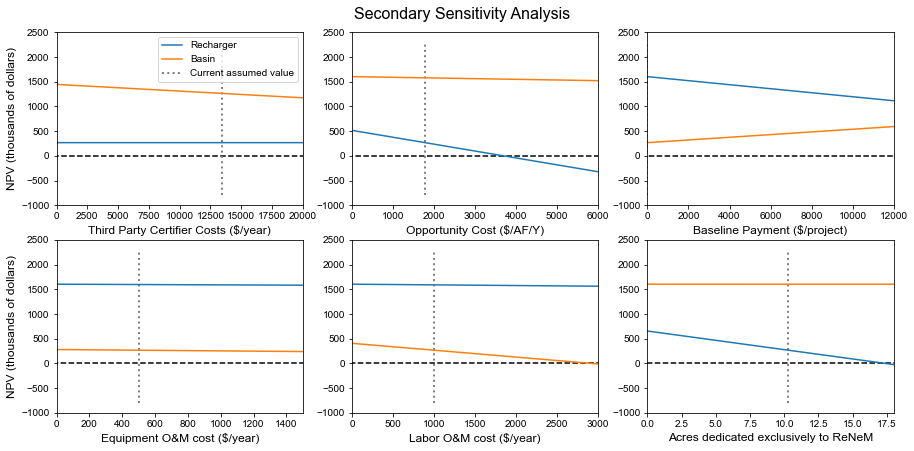

In [8]:
fig, ((ax1, ax2, ax5), (ax4, ax3, ax6)) = plt.subplots(2,3,  figsize = (15,7))
fig.suptitle('Secondary Sensitivity Analysis', y = .93, fontsize = 16)

#TPC Annual Costs 
tpc_ac1_range = np.arange(0,25000)
est_indx = np.where(tpc_ac1_range == tpc_ac)
R1_npvs = np.zeros(len(tpc_ac1_range))
A1_npvs = np.zeros(len(tpc_ac1_range))
T1_npvs = np.zeros(len(tpc_ac1_range))
for i, TPC_AC in enumerate(tpc_ac1_range):
    A1_npvs[i], R1_npvs[i], T1_npvs = npvs(n=n,Q=Q,V=V,C=C,lam=lam,r=r,o=o,s=s,a=a,M_e=M_e,M_l=M_l,P=P,F=F,tpc_ac=TPC_AC,tpc_fc=tpc_fc,i=i,B=B)
ax1.hlines(0,-10000,100000,color="black",linestyle="dashed"  )
#ax1.plot(tpc_ac1_range, A1_npvs/1e3, label = "Basin")
ax1.plot(tpc_ac1_range, R1_npvs/1e3, label = "Recharger" )
ax1.plot(tpc_ac1_range, (A1_npvs + T1_npvs)/1e3, label = "Basin" )
ax1.vlines(tpc_ac,-800, 2300, color="grey",linestyle = "dotted", linewidths=2, label = "Current assumed value")
ax1.set_ylabel("NPV (thousands of dollars)", size = 12)
ax1.set_xlabel("Third Party Certifier Costs ($/year)", size = 12)
ax1.set_xlim(0,20000)
ax1.set_ylim(-1000,2500)
ax1.legend(loc = "upper right")

#Opportunity Cost 
P2_range = np.arange(0,7500)
est_indx = np.where(P2_range == P)
R2_npvs = np.zeros(len(P2_range))
A2_npvs = np.zeros(len(P2_range))
T2_npvs = np.zeros(len(P2_range))
for i, p in enumerate(P2_range):
    A2_npvs[i], R2_npvs[i], T2_npvs = npvs(n=n,Q=Q,V=V,C=C,lam=lam,r=r,o=o,s=s,a=a,M_e=M_e,M_l=M_l,P=p,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)
ax2.hlines(0,-10000,100000,color="black",linestyle="dashed"  )
#ax2.plot(P2_range, A2_npvs/1e3, label = "Basin")
ax2.plot(P2_range, R2_npvs/1e3, label = "Recharger" )
ax2.plot(P2_range, (A2_npvs + T2_npvs)/1e3, label = "Basin" )
ax2.vlines(P,-800, 2300, color="grey",linestyle = "dotted", linewidths=2)
#ax2.set_ylabel("NPV (thousands of dollars)")
ax2.set_xlabel("Opportunity Cost ($/AF/Y)", size = 12)
ax2.set_xlim(0,6000)
ax2.set_ylim(-1000,2500)
#ax2.legend(loc="upper right")

#Baseline payment 
s5_range = np.arange(-10,12000)
est5_indx = np.where(s5_range.round()==round(s,))
R5_npvs = np.zeros(len(s5_range))
A5_npvs = np.zeros(len(s5_range))
T5_npvs = np.zeros(len(s5_range))
for i, S in enumerate(s5_range):
    A5_npvs[i], R5_npvs[i], T5_npvs = npvs(n=n,Q=Q,V=V,C=C,lam=lam,r=r,o=o,s=S,a=a,M_e=M_e,M_l=M_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)
ax5.hlines(0,-10000,12000,color="black",linestyle="dashed"  )
#ax5.plot(s5_range, A5_npvs/1e3, label = "Basin")
ax5.plot(s5_range, R5_npvs/1e3, color='#ff7f0e', label = "Recharger" )
ax5.plot(s5_range, (A5_npvs + T5_npvs)/1e3, color='#1f77b4', label = "Basin" )
ax5.vlines(s,-800, 2300, color="grey",linestyle = "dotted", linewidths=2)
ax5.set_xlim(0,12000)
ax5.set_ylim(-1000,2500)
#ax5.set_ylabel("NPV (thousands of dollars)", size = 10)
ax5.set_xlabel("Baseline Payment ($/project)", size = 12)

#O&M Labor
Ml3_range = np.arange(0,5000)
est_indx = np.where(Ml3_range.round()==(M_l,))
R3_npvs = np.zeros(len(Ml3_range))
A3_npvs = np.zeros(len(Ml3_range))
T3_npvs = np.zeros(len(Ml3_range))
for i, m_l in enumerate(Ml3_range):
    A3_npvs[i], R3_npvs[i], T3_npvs = npvs(n=n,Q=Q,V=V,C=C,lam=lam,r=r,o=o,s=s,a=a,M_e=M_e,M_l=m_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)
ax3.hlines(0,-10000,100000,color="black",linestyle="dashed"  )
#ax3.plot(Ml3_range, A3_npvs/1e3, label = "Basin")
ax3.plot(Ml3_range, (A3_npvs + T3_npvs)/1e3, label = "Basin" )
ax3.plot(Ml3_range, R3_npvs/1e3, label = "Recharger" )
ax3.vlines(M_l,-800, 2300, color="grey",linestyle = "dotted", linewidths=2)
#ax3.scatter(Ml3_range[est_indx],A3_npvs[est_indx]/1e3, edgecolor="blue", s=70, marker="D")
#ax3.scatter(Ml3_range[est_indx],R3_npvs[est_indx]/1e3, edgecolor="orange", s=70, marker="D")
#ax3.scatter(Ml3_range[est_indx],(A3_npvs[est_indx] + T3_npvs)/1e3, edgecolor="green", s=70, marker="D")
ax3.set_xlim(0,3000)
ax3.set_ylim(-1000,2500)
#ax3.set_ylabel("NPV (thousands of dollars)")
ax3.set_xlabel("Labor O&M cost ($/year)", size = 12)
#ax4.legend(loc="upper right")

#O&M Equipment
Me4_range = np.arange(0,5000)
est_indx = np.where(Me4_range.round()==(M_e,))
R4_npvs = np.zeros(len(Me4_range))
A4_npvs = np.zeros(len(Me4_range))
T4_npvs = np.zeros(len(Me4_range))
for i, m_e in enumerate(Me4_range):
    A4_npvs[i], R4_npvs[i], T4_npvs = npvs(n=n,Q=Q,V=V,C=C,lam=lam,r=r,o=o,s=s,a=a,M_e=m_e,M_l=M_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)
ax4.hlines(0,-10000,100000,color="black",linestyle="dashed"  )
#ax4.plot(Me4_range, A4_npvs/1e3, label = "Basin")
ax4.plot(Me4_range, (A4_npvs + T4_npvs)/1e3, label = "Basin incurring TPC costs" )
ax4.plot(Me4_range, R4_npvs/1e3, label = "Recharger" )
ax4.vlines(M_e,-800, 2300, color="grey",linestyle = "dotted", linewidths=2)
ax4.set_xlim(0,1500)
ax4.set_ylim(-1000,2500)
ax4.set_ylabel("NPV (thousands of dollars)", size = 12)
ax4.set_xlabel("Equipment O&M cost ($/year)", size = 12)
#ax4.legend(loc="upper right")

#Acres 
a6_range = np.arange(0,30)
est6_indx = np.where(a6_range == a)
R6_npvs = np.zeros(len(a6_range))
A6_npvs = np.zeros(len(a6_range))
T6_npvs = np.zeros(len(a6_range))
for i, A in enumerate(a6_range):
    A6_npvs[i], R6_npvs[i], T6_npvs = npvs(n=n,Q=Q,V=V,C=C,lam=lam,r=r,o=o,s=s,a=A,M_e=M_e,M_l=M_l,P=P,F=F,tpc_ac=tpc_ac,tpc_fc=tpc_fc,i=i,B=B)
ax6.hlines(0,-10000,10000,  color="black",linestyle="dashed"  )
#ax6.plot(a6_range, A6_npvs/1e3, label = "Basin")
ax6.plot(a6_range, R6_npvs/1e3, label = "Recharger" )
ax6.plot(a6_range, (A6_npvs + T6_npvs)/1e3, label = "Basin" )
ax6.vlines(a,-800, 2300, color="grey",linestyle = "dotted", linewidths=2)
ax6.set_xlim(0,18)
ax6.set_ylim(-1000,2500)
ax6.set_xlabel("Acres dedicated exclusively to ReNeM", size = 12)

fig.savefig("sensitivity_leftovers.png")
fig.savefig("sensitivity_leftovers.pdf")